In [136]:
import numpy as np
import matplotlib.pyplot as plt
import re
from twython import Twython
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im



In [137]:
#Connect to Twitter
APP_KEY = "qX0w3eviEnFZzfeG2umf7RpQ5"
APP_SECRET = "F2nbQjeeTR4MbipX1owPlDzAfddhO9EheLHNr1547boAA49NHI"
twitter = Twython(APP_KEY, APP_SECRET)


In [138]:
#Get timeline 

user_timeline=twitter.get_user_timeline(screen_name='Alienware',count=1, language='english') 
#get most recent id
last_id = user_timeline[0]['id']-1
for i in range(16):
    batch = twitter.get_user_timeline(screen_name='Alienware',count=200, max_id=last_id)
    user_timeline.extend(batch)
    last_id = user_timeline[-1]['id'] - 1

In [139]:
#user_timeline[0:1]

In [140]:
#Extract textfields from tweets
raw_tweets = []
for tweets in user_timeline:
    raw_tweets.append(tweets['text'])

In [141]:
#raw_tweets

In [142]:
#Create a string form of our list of text
raw_string = ''.join(raw_tweets)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)

In [143]:
#no_special_characters

In [144]:
words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 2]  # ignore a, an, be, ...
words = [w.lower() for w in words]
#lisst= ['hey','hola','know','let',"don't"]
words = [w for w in words if w not in STOPWORDS]
STOPWORDS.update([""])  #add unnccessary words appearing in wordcloud
#STOPWORDS type =set





In [170]:
#Pick any of your favorite images to use as a background image! 
#(Pro tip: works better with larger images with a white background)
mask = np.array(Image.open('C:\\Users\\ekta_\\Desktop\\Jupyter\\sentiment analysis\Alienware.png'))

In [171]:
wc = WordCloud(background_color="white", max_words=2000, width= 700, height=800, mask=mask)
clean_string = ','.join(words)
wc.generate(clean_string)

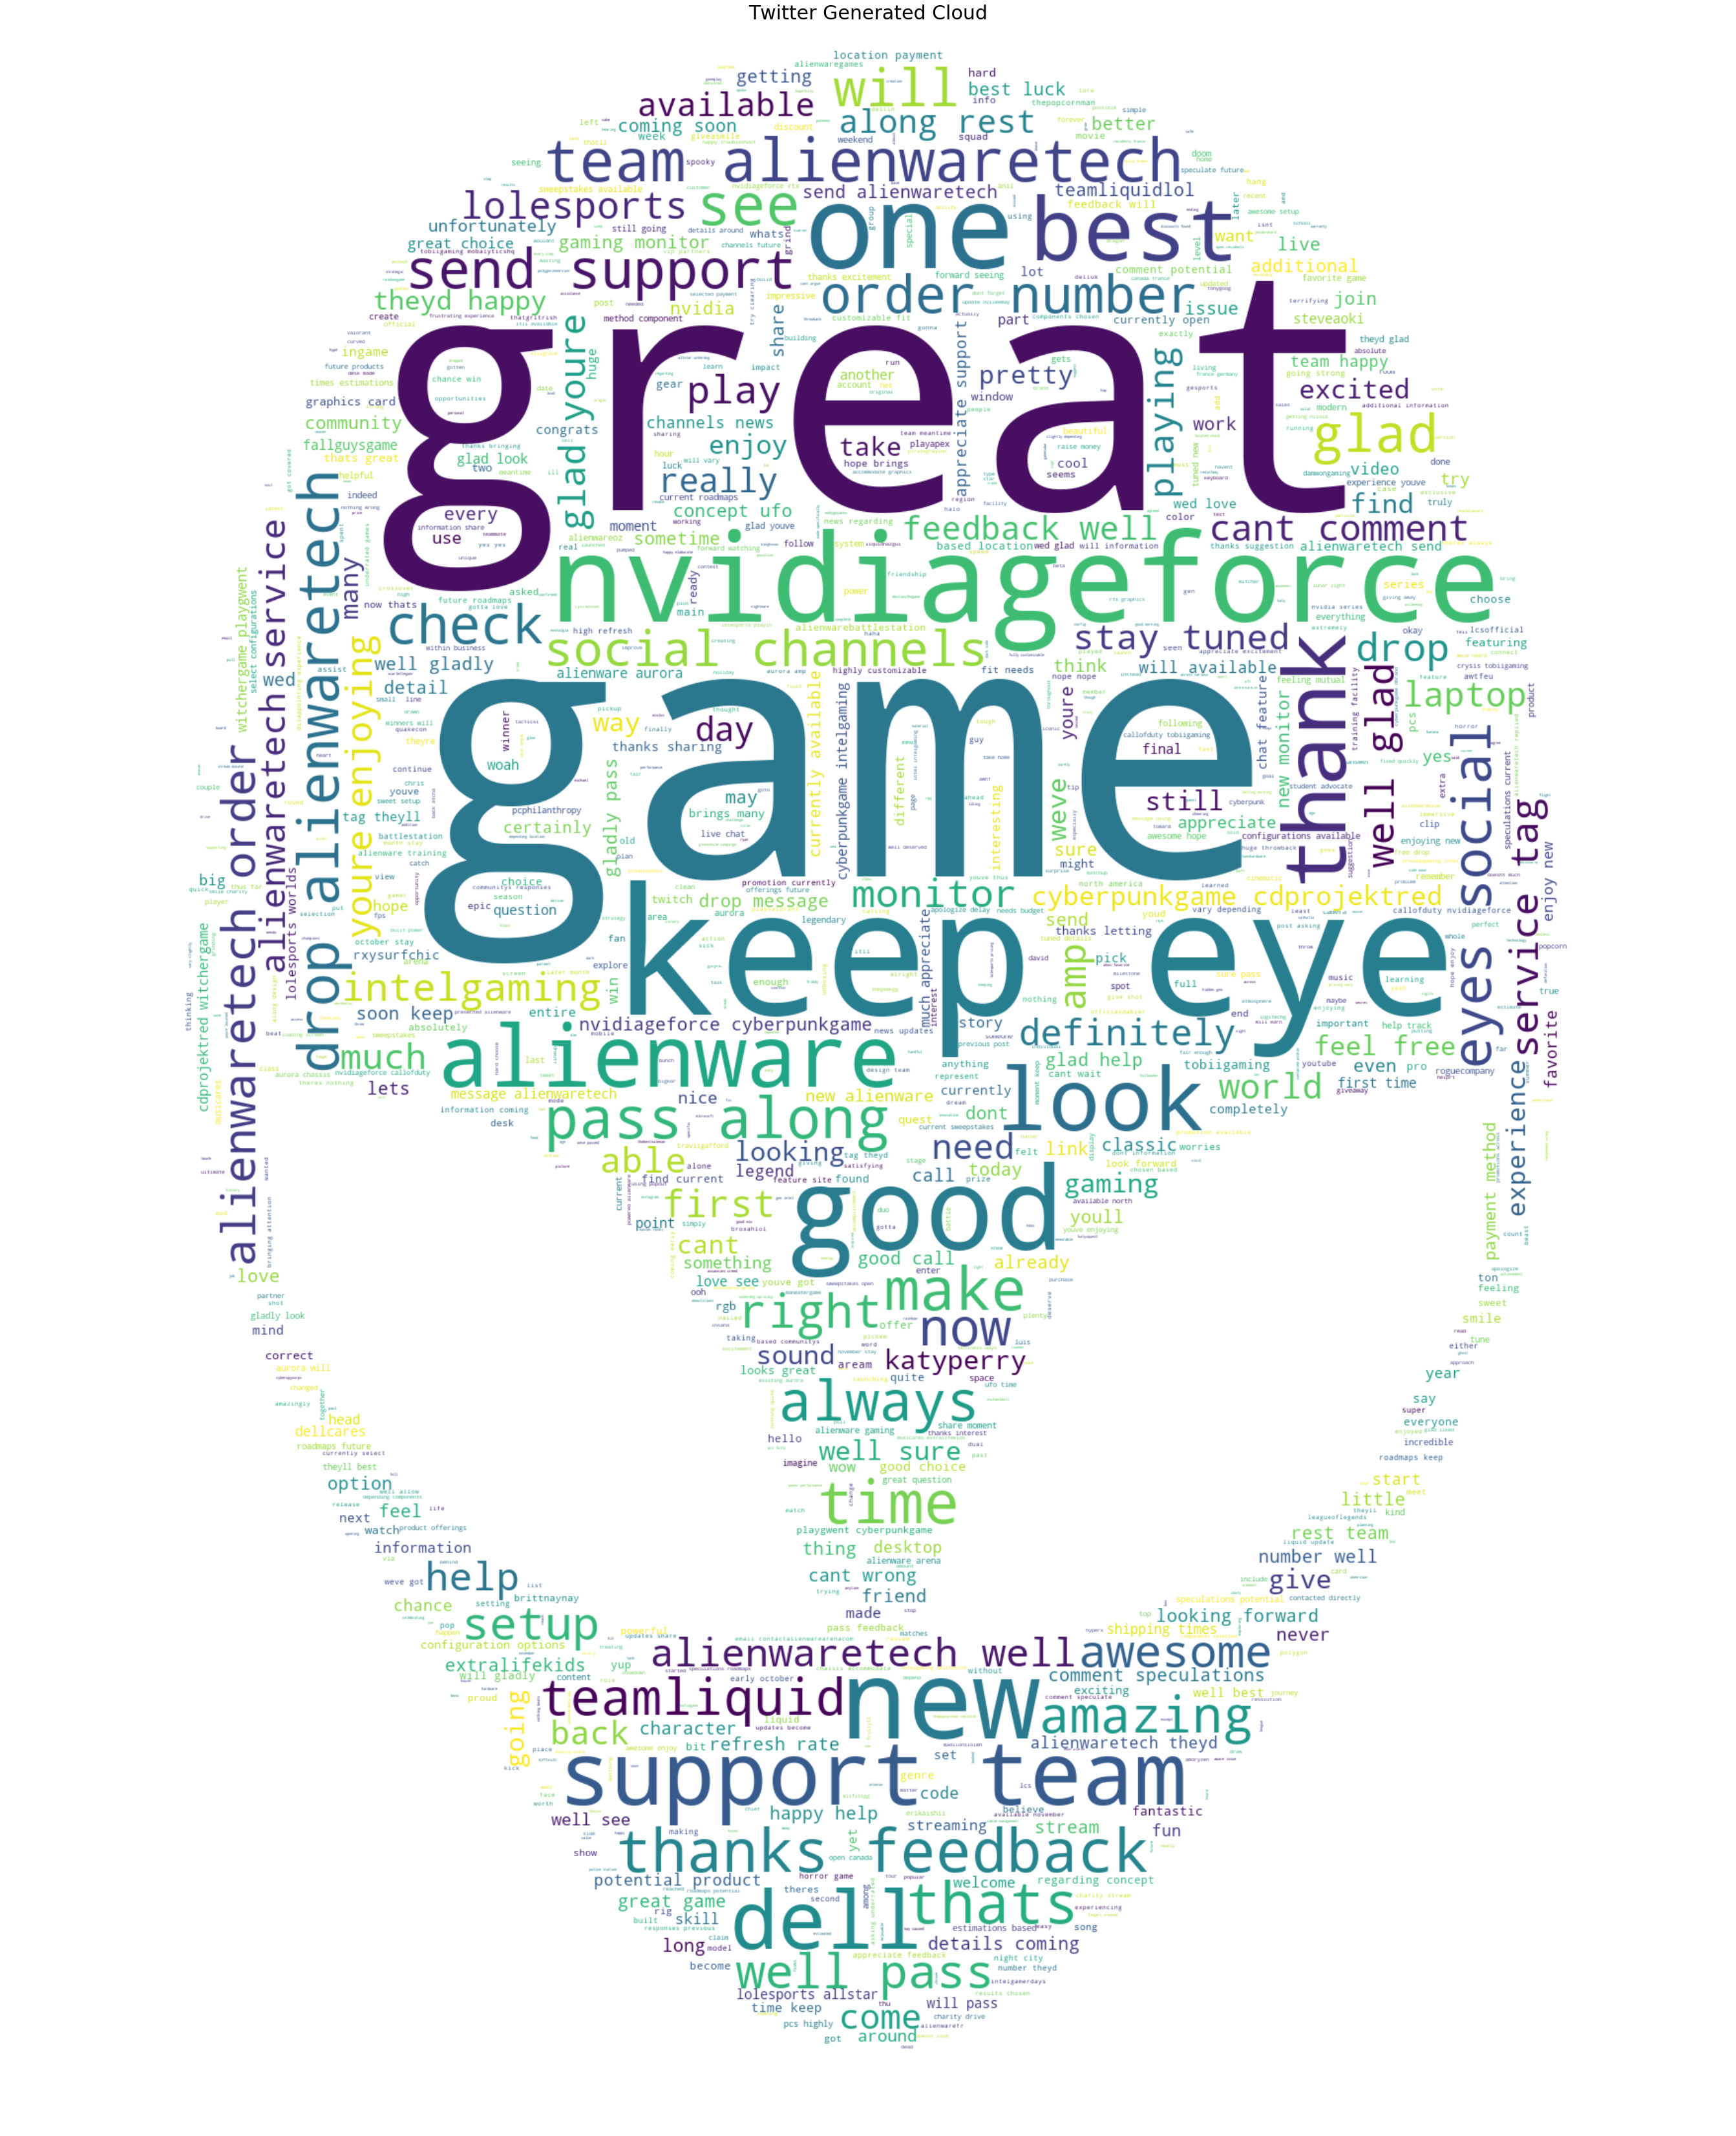

In [173]:

#f= plt.figure(figsize=(60,60))    add the red part if you want original image as a subplot

plt.figure(figsize=(60,60))

'''f.add_subplot(1,2, 1)    
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.title('Original Stencil', size=30)
plt.axis("off")
f.add_subplot(1,2, 2)'''
plt.imshow(wc, interpolation='bilinear')
plt.title('Twitter Generated Cloud', size=30)
plt.axis("off")
plt.show()